# Problem statement:  
The marketing team has prepared 10 different ads, and we have collected a dataset of Click Through Rates of all those ads. Looking at the dataset we have to find, which ad has the most probability of click rate.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
df = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

# Thompson Sampling Algorithm

In [25]:
# Creating variables
N = 10000 # Total number of users to show ads to
d = 10 # number of ads

selected_ads = [] # list of selected ads, will start empty

Ni_0 = [0] * d # number of times ad i has reward 0
Ni_1 = [0] * d # number of times ad i has reward 1

total_rewards = 0 # total rewards

In [26]:
import math, random

for n in range(0, N): # iterate through all users
    ad = 0 
    max_theta = 0
    for i in range(0, d): # iterate through all 
        
        '''
            random.betavariate(alpha, beta) 
            Beta distribution.  Conditions on the parameters are alpha > 0 
            and beta > 0. Returned values range between 0 and 1.
            
            Returns a random float number between 0 and 1 based on the 
            Beta distribution (used in statistics)
        ''' 
        random_theta = random.betavariate(Ni_1[i]+1, Ni_0[i]+1)

        if random_theta > max_theta:
            max_theta = random_theta
            ad = i
    
    selected_ads.append(ad) # append the ad with max_upper_bound to the list
    reward = df.values[n,ad] # get the reward from df for the selected ad

    # if reward is 0, the update Ni_0 else update Ni_1
    if reward==0:
        Ni_0[ad]+=1 
    else:
        Ni_1[ad]+=1  

    total_rewards += reward # add this reward to total reward

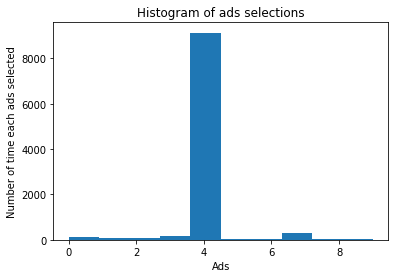

In [27]:
plt.hist(selected_ads)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of time each ads selected')
plt.show(); 

Clearly, Thompson Sampling is better than UCB